### Contents Based Filtering Plantit Dataset

In [1]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/gdrive')

plants=pd.read_excel('/gdrive/My Drive/Colab Notebooks/DataHandling/heatmap/mbti_environment_recommend.xlsx')
print(type(plants))
plants.head(10)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>


,id,plant_name,section,preference,air_purification,pet_safe,humidity,sunlight
0,1,몬스테라 델리시오사,plant,leafy vine broad split heart_shaped has_fruit,1,0,습도 : 높은 습도,반음지
1,2,올리브 나무,plant,leafy small has_fruit wooden has_flower,0,0,습도 : 쾌적한 습도,양지
2,3,몬스테라 알보 바리에가타,plant,leafy vine broad split heart_shaped patterned ...,1,0,습도 : 높은 습도,반양지
3,4,몬스테라 아단소니,plant,leafy hanging vine holed heart_shaped,0,0,습도 : 높은 습도,반양지
4,5,스투키,plant,cactus_succulent round long patterned fat has_...,0,0,습도 : 쾌적한 습도,반양지 ~ 반음지
5,6,은엽 아카시아,plant,leafy small fragrant has_flower,0,1,습도 : 쾌적한 습도,양지
6,7,사계귤 (유주나무),plant,leafy round thick fragrant has_fruit wooden ha...,0,1,습도 : 쾌적한 습도,양지
7,8,헤데라 (아이비),plant,leafy vine star_shaped small has_flower,1,0,습도 : 쾌적한 습도,반음지 ~ 음지
8,9,아레카야자,plant,leafy sharp long,1,1,습도 : 다소 높은 습도,반양지
9,10,금전수 (돈나무),plant,leafy round thick has_flower,1,0,습도 : 쾌적한 습도,반양지 ~ 반음지


In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 적용하기 위해 공백문자로 word 단위가 구분되는 문자열로 변환. 
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
prefer_mat = count_vect.fit_transform(plants['preference'])
print(prefer_mat.shape)

(245, 172)


In [3]:
from sklearn.metrics.pairwise import cosine_similarity

prefer_sim = cosine_similarity(prefer_mat, prefer_mat)
print(prefer_sim.shape)
print(prefer_sim)


(245, 245)
[[1.         0.20100756 0.83624201 ... 0.18181818 0.23354968 0.18181818]
 [0.20100756 1.         0.18490007 ... 0.10050378 0.25819889 0.10050378]
 [0.83624201 0.18490007 1.         ... 0.1672484  0.21483446 0.1672484 ]
 ...
 [0.18181818 0.10050378 0.1672484  ... 1.         0.62279916 0.72727273]
 [0.23354968 0.25819889 0.21483446 ... 0.62279916 1.         0.85634884]
 [0.18181818 0.10050378 0.1672484  ... 0.72727273 0.85634884 1.        ]]


In [4]:
# heat_data = pd.DataFrame(prefer_sim)
# xlxs_dir = '/gdrive/My Drive/Colab Notebooks/DataHandling/heatmap/heatmapdata.xlsx'

# with pd.ExcelWriter(xlxs_dir) as writer:
#      heat_data.to_excel(writer, sheet_name = 'heat')

In [5]:
prefer_sim_sorted_ind = prefer_sim.argsort()[:, ::-1]
print(prefer_sim_sorted_ind)

[[  0   2 160 ...  45 105 231]
 [  1  69 130 ... 182 173 129]
 [  2   0 160 ... 185 173 182]
 ...
 [242 244 243 ...  35  34 198]
 [243 244 241 ... 153 157 185]
 [244 243 242 ... 181  35 122]]


In [6]:
def find_sim_plant(df, sorted_ind, mbti_name):
    
    # 인자로 입력된 plants DataFrame에서 'plant_name' 컬럼이 입력된 mbti_name 값인 DataFrame추출
    mbti = df[df['plant_name'] == mbti_name]
    
    # mbti_name을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 prefer_sim_sorted_ind 객체에서 유사도 순으로 top_n 개의 index 추출
    mbti_index = mbti.index.values
    #similar_indexes = sorted_ind[mbti_index, :(top_n)]
    similar_indexes = sorted_ind[mbti_index]
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
    # print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]


In [7]:
similar_plants = find_sim_plant(plants, prefer_sim_sorted_ind, 'ENTP')
similar_plants = similar_plants[similar_plants['section'] == 'plant']
similar_plants[:10]

,id,plant_name,section,preference,air_purification,pet_safe,humidity,sunlight
228,229,무늬아이비,plant,leafy vine star_shaped patterned has_fruit has...,1,0,습도 : 쾌적한 습도,반양지
41,42,휘카스 움베르타,plant,leafy broad round heart_shaped has_fruit,0,0,습도 : 쾌적한 습도,양지 ~ 반양지
160,161,필로덴드론 베루코섬,plant,leafy vine broad heart_shaped patterned has_fruit,0,0,습도 : 높은 습도,반양지 ~ 반음지
207,208,필로덴드론 마메이,plant,leafy vine broad heart_shaped patterned has_fruit,0,0,습도 : 높은 습도,반음지 ~ 음지
108,109,제라늄,plant,leafy star_shaped patterned fragrant has_fruit...,1,0,습도 : 쾌적한 습도,양지 ~ 반양지
177,178,프테리스,plant,leafy long star_shaped patterned,1,1,습도 : 높은 습도,반음지
74,75,알로카시아 아마조니카,plant,leafy broad star_shaped patterned,1,0,습도 : 쾌적한 습도,반양지
163,164,무늬 산호수,plant,leafy sharp patterned has_fruit,0,0,습도 : 쾌적한 습도,반양지
158,159,안스리움 크리스탈리넘,plant,leafy broad heart_shaped patterned has_fruit w...,1,0,습도 : 높은 습도,반양지
2,3,몬스테라 알보 바리에가타,plant,leafy vine broad split heart_shaped patterned ...,1,0,습도 : 높은 습도,반양지


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 8]

In [9]:
hm_final = pd.read_excel('/gdrive/My Drive/Colab Notebooks/DataHandling/heatmap/heatmap_plant_MBTI.xlsx')
df_final = hm_final.pivot('Plant', 'MBTI', 'Weight')
df_final.head()

MBTI,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
Plant,,,,,,,,,,,,,,,,
Amazonian elephant's ear (African mask),31.448545,31.448545,16.903085,37.796447,10.482848,9.759001,0.000000,12.598816,42.857143,39.036003,33.806170,0.000000,11.396058,0.000000,9.759001,0.000000
Basil,12.403473,24.806947,40.000000,14.907120,24.806947,23.094011,29.814240,29.814240,16.903085,34.641016,60.000000,25.819889,53.935989,13.483997,34.641016,13.483997
Blue candle,16.724840,16.724840,26.967994,20.100756,33.449680,31.139958,60.302269,30.151134,11.396058,15.569979,13.483997,17.407766,36.363636,27.272727,62.279916,54.545455
Bunny ears cactus,18.490007,27.735010,59.628479,22.222222,27.735010,17.213259,44.444444,33.333333,25.197632,17.213259,44.721360,19.245009,20.100756,10.050378,34.426519,30.151134
Cretan brake,31.448545,31.448545,16.903085,37.796447,10.482848,9.759001,0.000000,12.598816,42.857143,39.036003,33.806170,0.000000,22.792115,11.396058,19.518001,11.396058


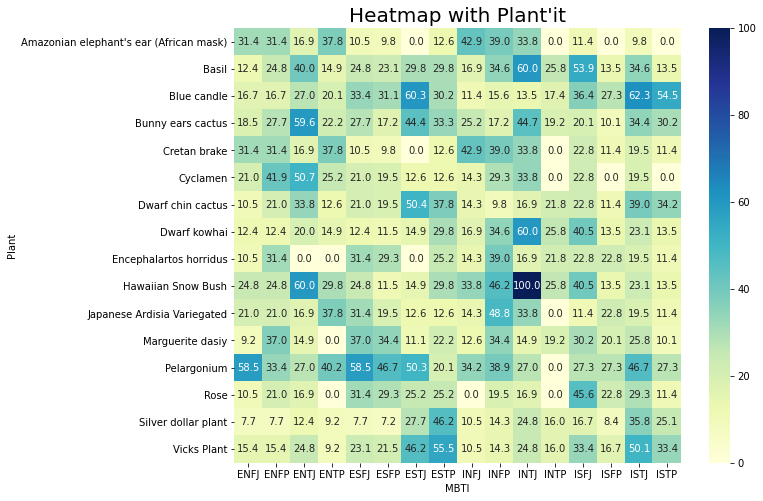

In [11]:
# different colormap
sns.heatmap(df_final, cmap='YlGnBu',annot=True, fmt='0.1f') 
plt.title('Heatmap with Plant\'it', fontsize=20)
plt.show()